In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check for missing values

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill Age missing values
df.Age.mean()

np.float64(29.69911764705882)

In [6]:
int(df.Age.mean())

29

In [7]:
df['Age'].fillna(30, inplace = True)

C:\Users\IBRAHIM YAHAYA ABDUL\AppData\Local\Temp\ipykernel_9052\3842053916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(30, inplace = True)


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
df.Embarked.fillna('s', inplace = True)

C:\Users\IBRAHIM YAHAYA ABDUL\AppData\Local\Temp\ipykernel_9052\3769124829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked.fillna('s', inplace = True)


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Check for duplicates

In [13]:
df.duplicated().sum()

np.int64(0)

### Outliers

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
df.select_dtypes(include = ['float64', 'int64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,30.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
df.select_dtypes(include = ['float64','int64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [19]:
numerical_column = df.select_dtypes(include = ['float64','int64']).columns

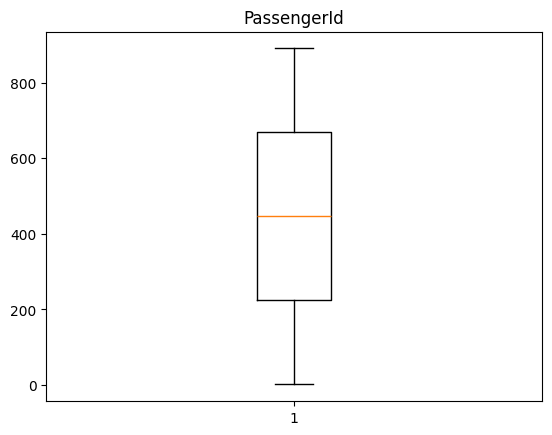

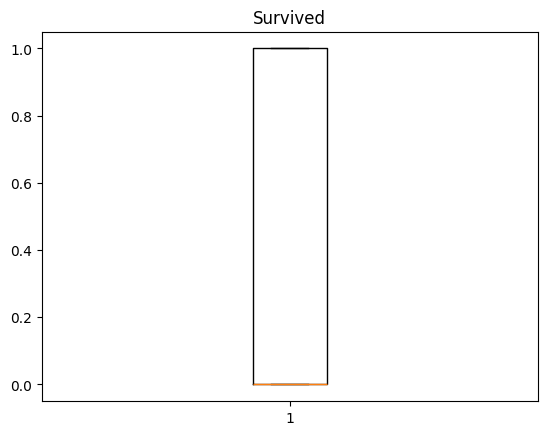

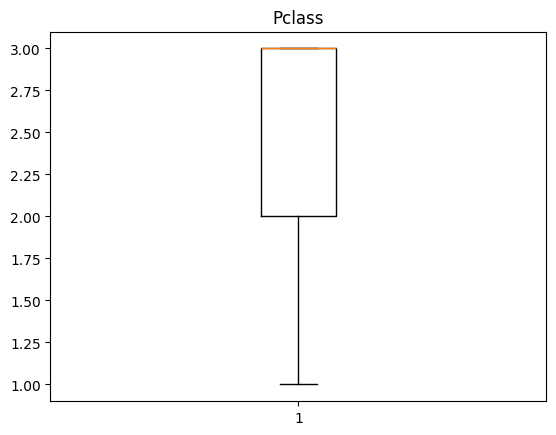

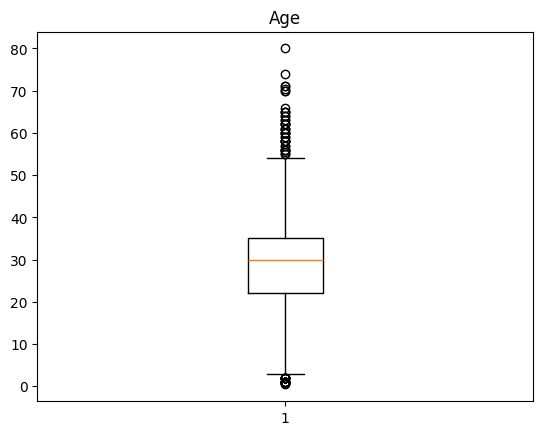

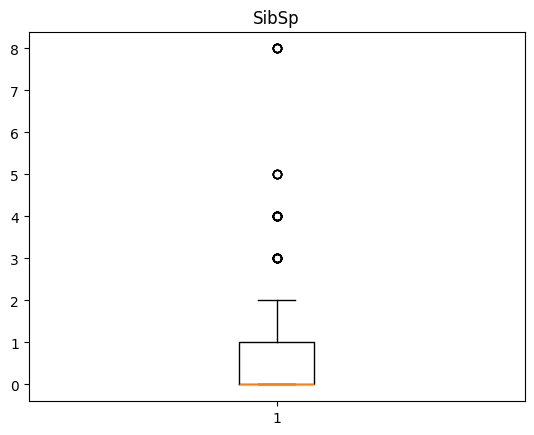

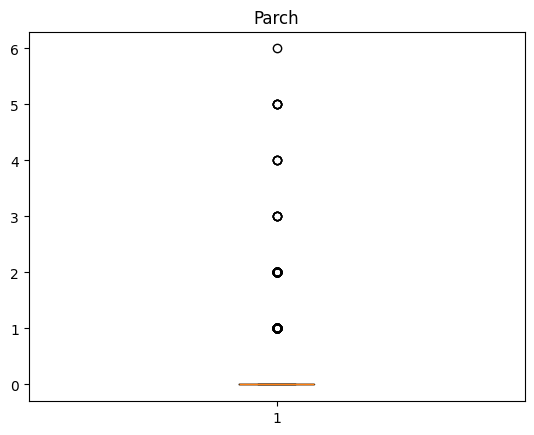

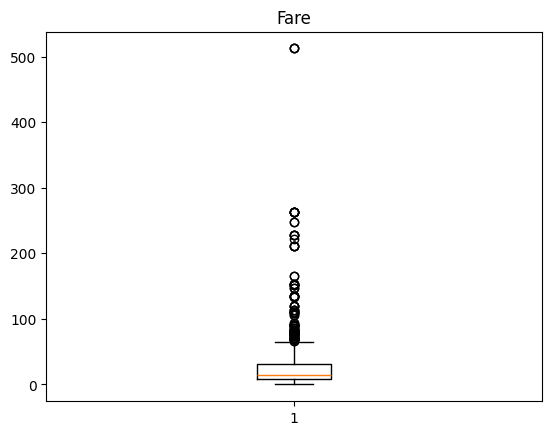

In [20]:
for x in numerical_column:
    plt.boxplot(df[x])
    plt.title(x)
    plt.show()

C:\Users\IBRAHIM YAHAYA ABDUL\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


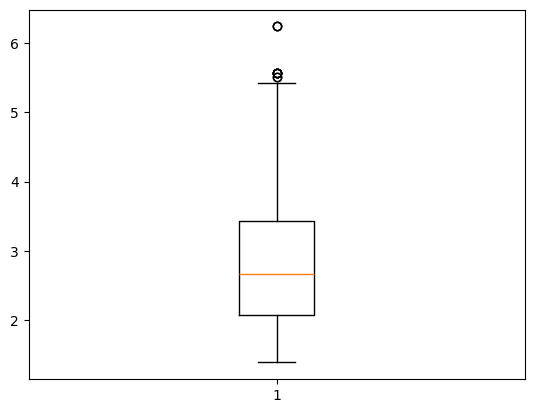

In [21]:
# Handle Fare outlier
plt.boxplot(np.log(df.Fare))
plt.show()

In [22]:
df['Fare'] = np.log(df['Fare'])

C:\Users\IBRAHIM YAHAYA ABDUL\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,S


In [24]:
# df.Embarked.replace('s', 'southampton', inplace = True)

In [25]:
df.Embarked.replace({'C' : 'cherbourg', 'S':'southampton', 'Q' : "queenstown"}, inplace = True)

C:\Users\IBRAHIM YAHAYA ABDUL\AppData\Local\Temp\ipykernel_9052\2383463443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked.replace({'C' : 'cherbourg', 'S':'southampton', 'Q' : "queenstown"}, inplace = True)


In [26]:
df.Embarked.unique()

array(['southampton', 'cherbourg', 'queenstown', 's'], dtype=object)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,southampton


### Feature Engineering

In [28]:
# Converting age to age group
def age_converter(age):
    if age < 18:
        return 'minor'
    elif age < 50:
        return "Adult"
    else:
        return 'old'

In [29]:
age_converter(40)

'Adult'

In [30]:
age_converter(60)

'old'

In [31]:
df.Age.apply(age_converter)

0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
       ...  
886    Adult
887    Adult
888    Adult
889    Adult
890    Adult
Name: Age, Length: 891, dtype: object

In [32]:
df['age_group'] = df.Age.apply(age_converter)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,southampton,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,cherbourg,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,southampton,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,southampton,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,southampton,Adult


### A

In [34]:
# Q(1)
df.Survived.sum()

np.int64(342)

In [35]:
Total_survivor = df.Survived.sum()

In [36]:
df.PassengerId.count()

np.int64(891)

In [37]:
Total_population = df.PassengerId.count()

In [38]:
Total_survivor / Total_population * 100

np.float64(38.38383838383838)

In [39]:
Survival_rate = Total_survivor / Total_population * 100

In [40]:
Survival_rate

np.float64(38.38383838383838)

In [41]:
# survival rate by gender
df.groupby(['Sex', 'Survived']).agg({"PassengerId": "count"}).reset_index()

,Sex,Survived,PassengerId
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [42]:
df.groupby('Sex')['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [43]:
# survival rate by gender
male_count = df[df['Sex'] == 'male']['PassengerId'].count()
male_count

np.int64(577)

In [44]:
female_count = df[df['Sex'] == 'female']['PassengerId'].count()
female_count

np.int64(314)

In [45]:
a = df['Sex'] == 'male'
b = df['Survived'] == 1
male_survived = df[a & b]['PassengerId'].count()
male_survived

np.int64(109)

In [46]:
a = df['Sex'] == 'female'
b = df['Survived'] == 1
female_survived = df[a & b]['PassengerId'].count()
female_survived

np.int64(233)

In [47]:
female_survived_rate = (female_survived / female_count) * 100
male_survived_rate = (male_survived / male_count) * 100
print("Female survived rate is",female_survived_rate)
print("male survived rate is",male_survived_rate)

Female survived rate is 74.20382165605095
male survived rate is 18.890814558058924


In [48]:
# Passenger 
df.groupby(['age_group','Sex']).agg({'PassengerId':'count'}).reset_index()

,age_group,Sex,PassengerId
0,Adult,female,237
1,Adult,male,467
2,minor,female,55
3,minor,male,58
4,old,female,22
5,old,male,52


In [49]:
passenger_dist = df.groupby(['age_group','Sex']).agg({'PassengerId':'count'}).reset_index()

<BarContainer object of 6 artists>

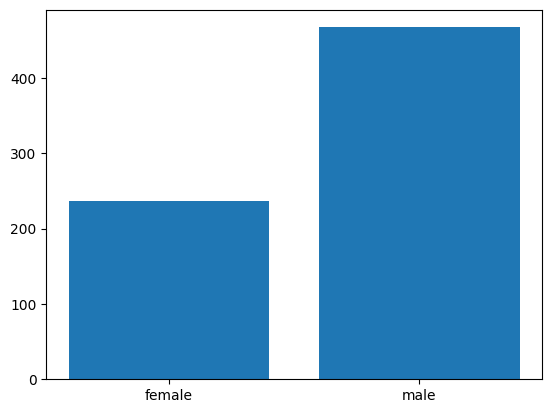

In [50]:
plt.bar(passenger_dist['Sex'], passenger_dist['PassengerId'])

In [51]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

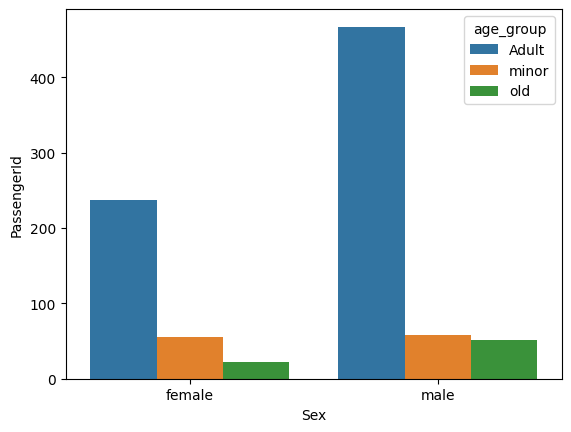

In [52]:
sns.barplot(data= passenger_dist, x = 'Sex', y = 'PassengerId', hue = 'age_group')
plt.show

In [53]:
# Age 
Age_distributon_by_class = df.groupby('Pclass')['Age'].describe()

In [54]:
Age_distributon_by_class

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,37.089907,14.024774,0.92,29.00,35.0,47.25,80.0
2,184.0,29.884946,13.573790,0.67,23.00,30.0,36.00,70.0
3,491.0,26.486599,10.841502,0.42,20.25,30.0,30.00,74.0


In [55]:
Age_distributon_by_class = df.groupby(['Pclass']).agg({'Age':'mean','PassengerId':'count'}).reset_index()

In [56]:
Age_distributon_by_class

,Pclass,Age,PassengerId
0,1,37.089907,216
1,2,29.884946,184
2,3,26.486599,491


C:\Users\IBRAHIM YAHAYA ABDUL\AppData\Local\Temp\ipykernel_9052\2084041456.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'Pclass', y = 'Age', palette='Set2')


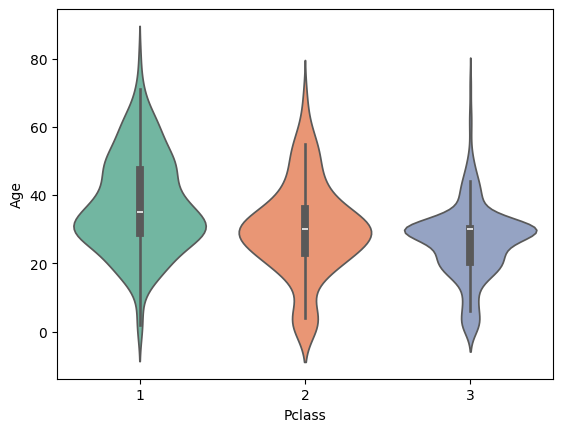

In [57]:
sns.violinplot(data = df, x = 'Pclass', y = 'Age', palette='Set2')
plt.show()

In [58]:
# VIOLINPLOT And BOXPLOT ia only based on distribution  

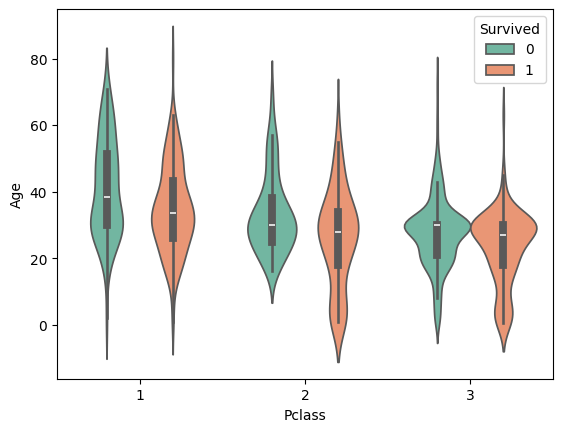

In [59]:
sns.violinplot(data = df, x = 'Pclass', y = 'Age', palette='Set2', hue= "Survived")
plt.show()

In [60]:
# survival rate among classes
Survival_rate_pclass = df.groupby('Pclass')['Survived'].mean() * 100 

In [61]:
Survival_rate_pclass

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

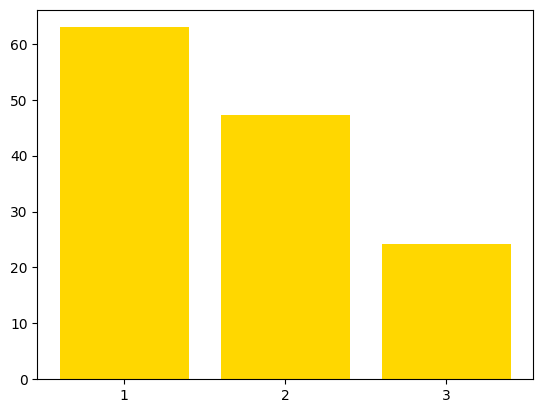

In [62]:
plt.bar(Survival_rate_pclass.index,Survival_rate_pclass.values, color = 'gold')
plt.xticks([1, 2, 3])
plt.show()

C:\Users\IBRAHIM YAHAYA ABDUL\AppData\Local\Temp\ipykernel_9052\4134597429.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Survival_rate_pclass.index, y = Survival_rate_pclass.values, palette = 'coolwarm')


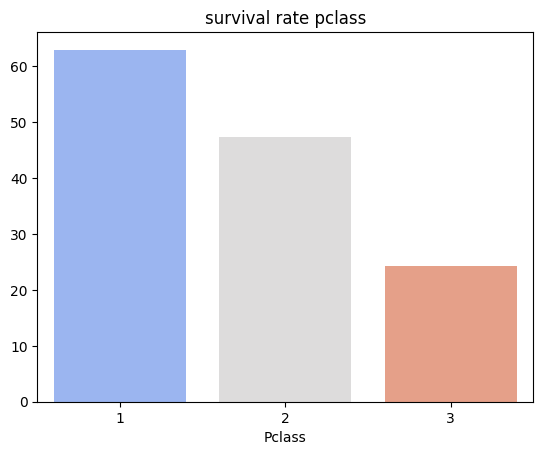

In [63]:
sns.barplot(x = Survival_rate_pclass.index, y = Survival_rate_pclass.values, palette = 'coolwarm')
plt.title("survival rate pclass")
plt.show()

In [64]:
# percentage traveling with family members

In [65]:
a = df['SibSp'] > 0
b = df['Parch'] > 0

In [66]:
df[a|b]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,southampton,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,cherbourg,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,southampton,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,southampton,minor
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,southampton,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,3.178054,cherbourg,Adult
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,cherbourg,old
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,southampton,Adult
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,3.371597,queenstown,Adult


In [67]:
Travelling_with_family = df[a|b]

In [68]:
len(Travelling_with_family) / len(df) * 100

39.73063973063973

In [69]:
# percentage of people not traviling with family members
a = df['SibSp'] == 0
b = df['Parch'] == 0
Travelling_with_family = df[a & b]

In [70]:
len(Travelling_with_family) / len(df) * 100

60.26936026936027

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,southampton,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,cherbourg,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,southampton,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,southampton,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,southampton,Adult


In [72]:
df['Embarked'].unique()

array(['southampton', 'cherbourg', 'queenstown', 's'], dtype=object)

## DATA ENCODER CATEGORICAL COLUMN

## ONE HOT ENCODING

In [75]:
## DROPPING THE NAME COLUMNS
df.drop(['Name', 'Ticket'],axis=1, inplace = True)

In [76]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
0,1,0,3,male,22.0,1,0,1.981001,southampton,Adult
1,2,1,1,female,38.0,1,0,4.266662,cherbourg,Adult
2,3,1,3,female,26.0,0,0,2.070022,southampton,Adult
3,4,1,1,female,35.0,1,0,3.972177,southampton,Adult
4,5,0,3,male,35.0,0,0,2.085672,southampton,Adult


In [77]:
categorical_columns = df.select_dtypes(include = ['object'])
categorical_columns.columns

Index(['Sex', 'Embarked', 'age_group'], dtype='object')

In [78]:
for x in categorical_columns:
    one_hot = pd.get_dummies(df[x], dtype = int)
    df = pd.concat([df, one_hot], axis=1)

In [79]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group,female,male,cherbourg,queenstown,s,southampton,Adult,minor,old
0,1,0,3,male,22.0,1,0,1.981001,southampton,Adult,0,1,0,0,0,1,1,0,0
1,2,1,1,female,38.0,1,0,4.266662,cherbourg,Adult,1,0,1,0,0,0,1,0,0
2,3,1,3,female,26.0,0,0,2.070022,southampton,Adult,1,0,0,0,0,1,1,0,0
3,4,1,1,female,35.0,1,0,3.972177,southampton,Adult,1,0,0,0,0,1,1,0,0
4,5,0,3,male,35.0,0,0,2.085672,southampton,Adult,0,1,0,0,0,1,1,0,0


In [ ]:
df.drop(['Sex', 'age_group', 'Embarked'],axis=1, inplace = Tr